In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC #specify in the report the classifier use from scikit learn, for all 3 projects
from sklearn.datasets import load_wine

dataset = load_wine() #load the wine dataset
X = dataset["data"] #assign features to X matrix
y = dataset["target"] # assign labels to Y vector
feature_names = dataset["feature_names"]

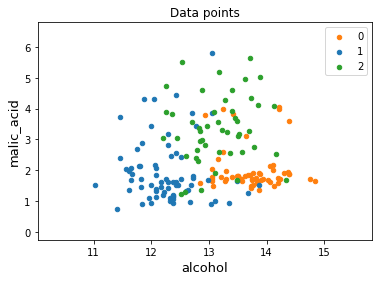

In [2]:
# Calculate min, max and limits on dataset
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Plot wine dataset, encoding label with color
plt.figure()

color = ['tab:orange', 'tab:blue', 'tab:green']
for i in [0, 1, 2]:
    mask = y==i
    plt.scatter(X[mask, 0], X[mask, 1], c=color[i], s = 20, label = i)
    
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Data points")
plt.xlabel(feature_names[0], fontsize = 13)
plt.ylabel(feature_names[1], fontsize = 13)
plt.legend()

plt.show()

In [3]:
# Split dataset without stratification too see how changes data distributino from train, test, validation set

from sklearn.model_selection import train_test_split

#shuffle = default True, since y array is ordered by category

X_train, X_test, y_train, y_test = train_test_split(X[:, 0:2], y, test_size = 0.3, shuffle = True) #test size = 30% of the total

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.285, shuffle = True) #0.285*0.7 = 0.2 = validation set size

In [4]:
#Print distribution respect to the label for train, test, validation sets without stratification

from collections import Counter

c = Counter(y)

print("original")
for i in [0,1,2]:
    print(i, c[i]/len(y))

c = Counter(y_train)


print("train")
for i in [0,1,2]:
    print(i, c[i]/len(y_train))

c = Counter(y_test)

print("test")
for i in [0,1,2]:
    print(i, c[i]/len(y_test))
    
c = Counter(y_val)

print("validation")
for i in [0,1,2]:
    print(i, c[i]/len(y_val))

original
0 0.33146067415730335
1 0.398876404494382
2 0.2696629213483146
train
0 0.3522727272727273
1 0.375
2 0.2727272727272727
test
0 0.2962962962962963
1 0.42592592592592593
2 0.2777777777777778
validation
0 0.3333333333333333
1 0.4166666666666667
2 0.25


Validation set is heavily unbalanced respect to training set and test set.
This means we would train a model on a specific data distribution, validate in a new one, for it to perform on a third one.
This unbalancement could result in bad performances: we can use stratification to preserve original data distribution.

In [5]:
from sklearn.model_selection import train_test_split

#shuffle = default True, since y array is ordered by category

X_train, X_test, y_train, y_test = train_test_split(X[:, 0:2], y, test_size = 0.3, shuffle = True, 
                                                    stratify = y, random_state = 1001) #test size = 30% of the total

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.285, shuffle = True, 
                                                  stratify = y_train, random_state = 300) #0.285*0.7 = 0.2 = validation set size

In [6]:
# Print distribution of train, test, validation sets with stratification

c = Counter(y)

print("original")
for i in [0,1,2]:
    print(i, c[i]/len(y))

c = Counter(y_train)

print("train")
for i in [0,1,2]:
    print(i, c[i]/len(y_train))

c = Counter(y_test)

print("test")
for i in [0,1,2]:
    print(i, c[i]/len(y_test))
    
c = Counter(y_val)

print("validation")
for i in [0,1,2]:
    print(i, c[i]/len(y_val))

original
0 0.33146067415730335
1 0.398876404494382
2 0.2696629213483146
train
0 0.32954545454545453
1 0.4090909090909091
2 0.26136363636363635
test
0 0.3333333333333333
1 0.3888888888888889
2 0.2777777777777778
validation
0 0.3333333333333333
1 0.3888888888888889
2 0.2777777777777778


In the latter case the data distribution in clearly better preserved

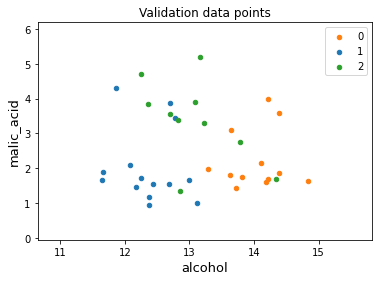

In [7]:
from matplotlib.colors import ListedColormap


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#24BCD2'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])

# Calculate min, max and limits on validation set
x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1

# Plot validation set data with respective labels
plt.figure()

color = ['tab:orange', 'tab:blue', 'tab:green']
for i in [0, 1, 2]:
    mask = y_val==i
    plt.scatter(X_val[mask, 0], X_val[mask, 1], c=color[i], s = 20, label = i)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Validation data points")
plt.xlabel(feature_names[0], fontsize = 13)
plt.ylabel(feature_names[1], fontsize = 13)
plt.legend()

plt.show()

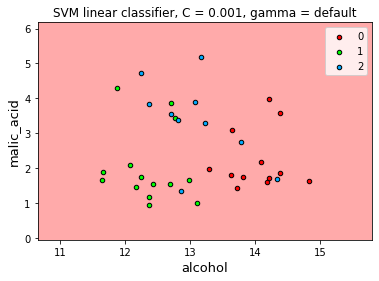

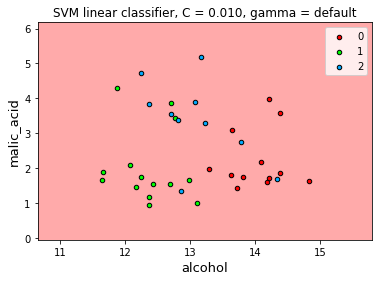

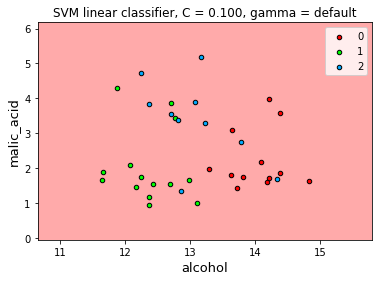

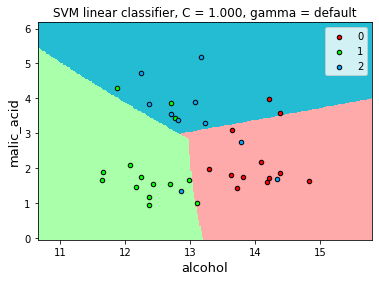

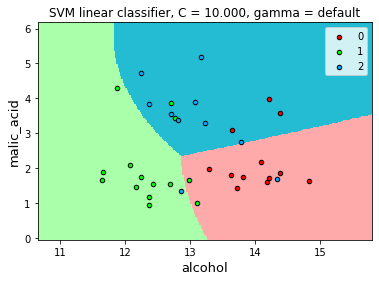

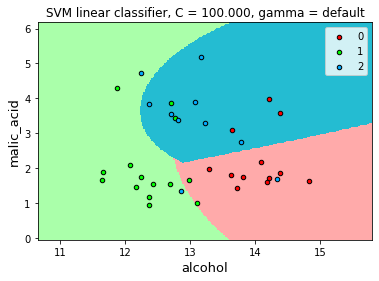

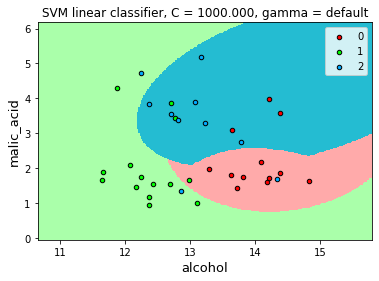

In [8]:
from sklearn.metrics import accuracy_score

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
c_dict = {}  #instantiate a dictionary for accuracy scores given different C 
h = .02  # step size in the mesh
y_val_pred = np.zeros((len(C), y_val.shape[0]))
index = 0


for c in C:
    clf = SVC(C = c, kernel = 'rbf')
    clf.fit(X_train, y_train)
    y_val_pred[index] = clf.predict(X_val)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the meshgrid [x_min, x_max]x[y_min, y_max].

    x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
    y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1

    # define meshgrid to represent boundaries on the plot
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # make predictions over all points in the meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #Z.shape = xx.shape[0]*xx.shape[1]

    # Put the result inside a plot. Colors define decision boundaries
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the validation points, with ground truth label y_val
    color = ['#FF0000', '#00FF00', '#00AAFF']
    for i in [0, 1, 2]:
        mask = y_val == i
        plt.scatter(X_val[mask, 0], X_val[mask, 1], c=color[i], cmap=cmap_bold,
                    edgecolor='k', s=20, label = i)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(feature_names[0], fontsize = 13)
    plt.ylabel(feature_names[1], fontsize = 13)
    plt.title("SVM linear classifier, C = %.3f, gamma = default" % (c))
    plt.legend()
    
    plt.show()

    
    c_dict["C=%.3f" %(c)] = accuracy_score(y_val, y_val_pred[index])
    index+=1
    


In [9]:
accuracy = pd.Series(c_dict, index = c_dict.keys())
accuracy

C=0.001       0.388889
C=0.010       0.388889
C=0.100       0.388889
C=1.000       0.750000
C=10.000      0.750000
C=100.000     0.722222
C=1000.000    0.750000
dtype: float64

__C and gamma tuning__

In order to be able to visualize how decision boundaries changes by changing gamma and C together, perform a "manual" grid search (i.e. not using scikit learn GridSearchCV class)
over gamma and C values together, plot the results and the relative accuracy on the evaluation dataset 

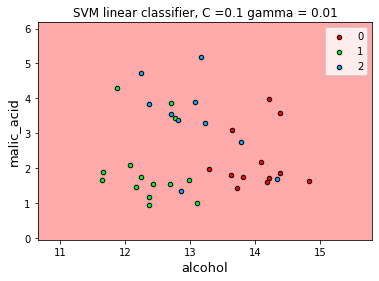

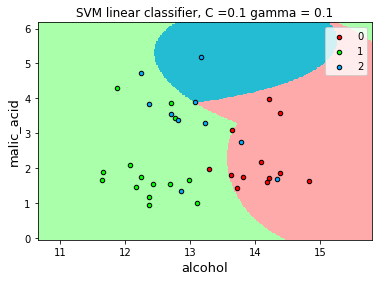

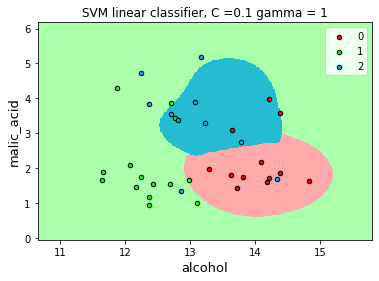

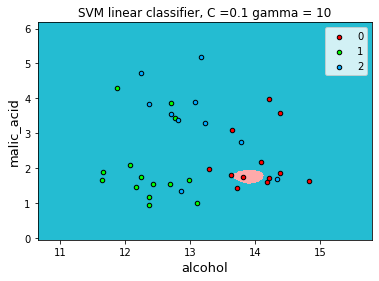

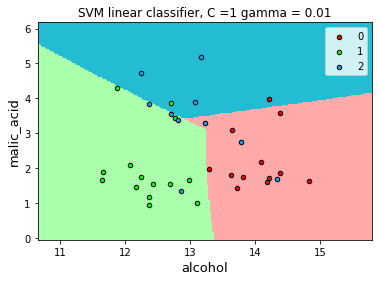

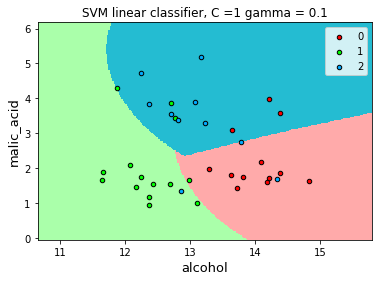

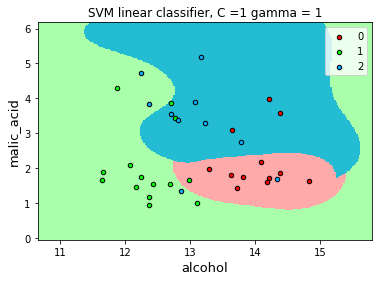

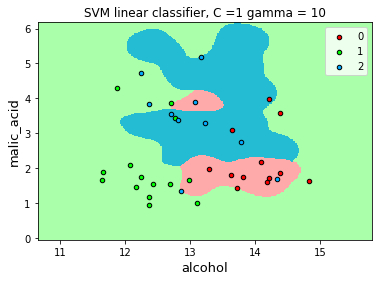

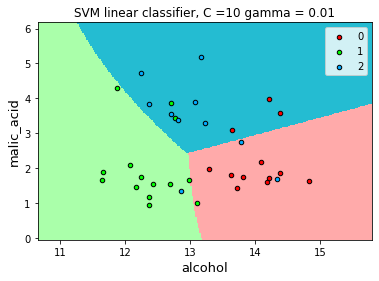

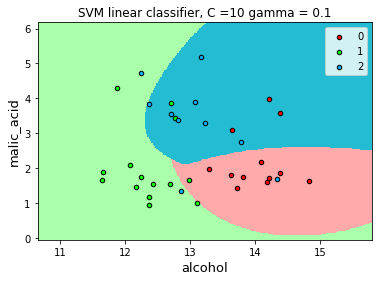

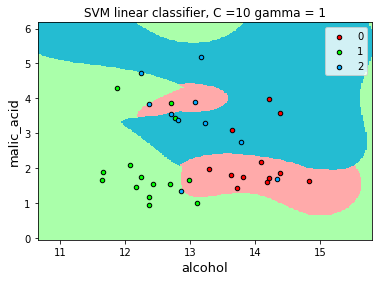

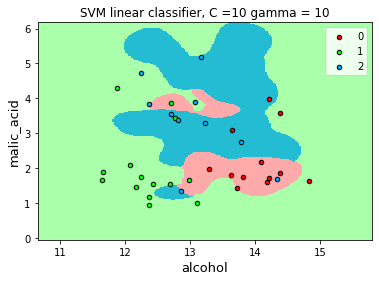

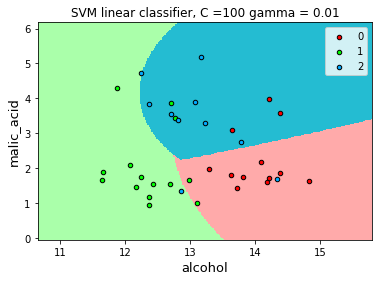

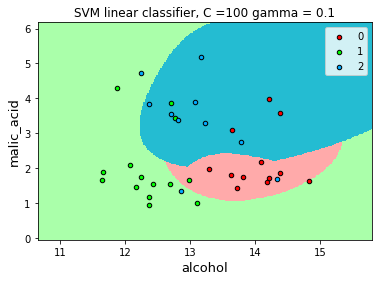

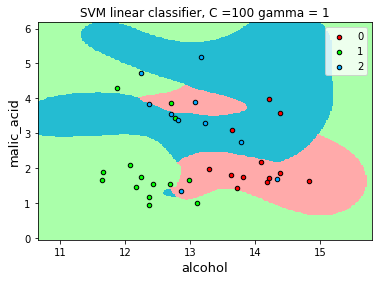

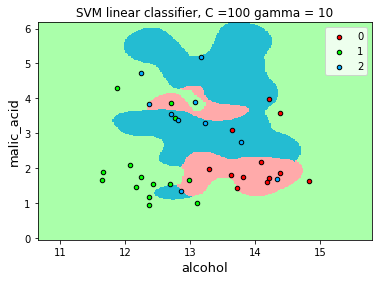

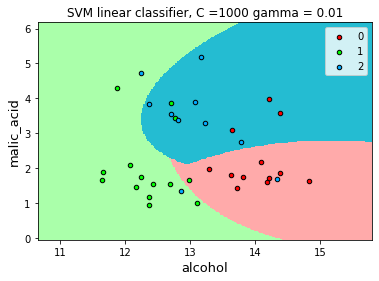

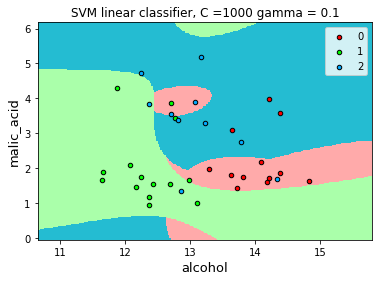

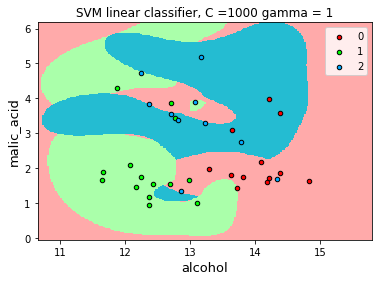

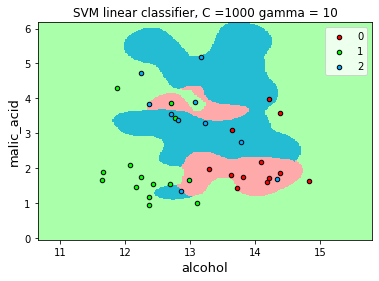

In [22]:
C = [0.1, 1, 10, 100, 1000]
gamma = [0.01, 0.1, 1, 10]

y_val_pred = np.zeros((len(C)*len(gamma), y_val.shape[0]))

index = 0

c_dict = {} #empty dict

for c in C:
    gamma_dict = {} #empty dict
    for g in gamma:
        
        clf = SVC(C = c, gamma = g, kernel = 'rbf')
        clf.fit(X_train, y_train)
        y_val_pred[index] = clf.predict(X_val)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].

        x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
        y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1

        #define meshgrid to represent boundaries on the plot
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        #make predictions over all points in the meshgrid
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        #Z.shape = xx.shape[0]*xx.shape[1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the validation points, with ground truth label y_val
        color = ['#FF0000', '#00FF00', '#00AAFF']
        for i in [0, 1, 2]:
            mask = y_val == i
            plt.scatter(X_val[mask, 0], X_val[mask, 1], c=color[i], cmap=cmap_bold,
                        edgecolor='k', s=20, label = i)

        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xlabel(feature_names[0], fontsize = 13)
        plt.ylabel(feature_names[1], fontsize = 13)
        plt.title("SVM linear classifier, C ={} gamma = {}".format(c, g))
        plt.legend()

        plt.show()
        
        gamma_dict['gamma %.3f' %(g)] = accuracy_score(y_val, y_val_pred[index]).round(decimals = 2)
        index+=1
        
    c_dict['C %.1f' %(c)] = gamma_dict

In [11]:
accuracy = pd.DataFrame(c_dict)
accuracy

,C 0.1,C 1.0,C 10.0,C 100.0,C 1000.0
gamma 0.010,0.39,0.75,0.75,0.72,0.75
gamma 0.100,0.72,0.75,0.75,0.72,0.69
gamma 1.000,0.72,0.72,0.69,0.72,0.69
gamma 10.000,0.42,0.69,0.69,0.69,0.69


Now fit a model using the best configuration provided by the gridsearch, then perform prediction on the test set

In [12]:
clf = SVC(C = 1, gamma = 0.1, kernel = 'rbf')
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

test_accuracy

0.8333333333333334

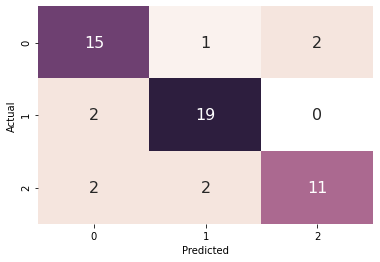

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cmap = sns.cubehelix_palette(light=1, as_cmap=True)

conf_mat = confusion_matrix(y_test, y_test_pred)

# Plot the result on a confusion matrix
label_names = ['0', '1', '2']
conf_mat_df = pd.DataFrame(conf_mat, index = label_names, columns = label_names)
conf_mat_df.index.name = 'Actual'
conf_mat_df.columns.name = 'Predicted'
sns.heatmap(conf_mat_df, annot=True, cmap= cmap, 
            annot_kws={"size": 16}, fmt='g', cbar=False)
plt.show()

__KFOLD CROSS VALIDATION__

Following step is to perform cross validation on the different configuration of C and gamma of the classifier
On the scores provided by cross validation, I will compute the average score, to be able to know how my model behavs on average on unseen data, and also the standard deviation of the score: this allows to have an insight on how differently the model behaves on new data

In [14]:
from sklearn.model_selection import KFold

#redefine train set merging training and validation sets

X_train_new = np.vstack((X_train, X_val))
y_train_new = np.hstack((y_train, y_val))

X_test_new = X_test
y_test_new = y_test

kfold = KFold(n_splits = 5, shuffle = True, random_state = 52)

In [15]:
C = [0.01, 0.1, 1, 10, 100, 1000]
gamma = [10, 1, 0.1, 0.01]

C_dict = {} #empty dict
    
for c in C:
    gamma_dict = {} #empty dict
    
    for g in gamma:
        accuracy = np.zeros(5, dtype = float)
        index = 0
        
        for train_ind, eval_ind in kfold.split(X_train, y_train):
            X_train_kfold = X_train_new[train_ind]
            y_train_kfold = y_train_new[train_ind]
            X_eval = X_train_new[eval_ind]
            y_eval = y_train_new[eval_ind]

            clf = SVC(C = c, gamma = g, kernel = 'rbf')
            clf.fit(X_train_kfold, y_train_kfold)
            y_eval_pred = clf.predict(X_eval)
            
            accuracy[index] += accuracy_score(y_eval, y_eval_pred)
            
            index +=1
        
        gamma_dict['gamma %.3f' %(g)] = ("%.3f" %(np.mean(accuracy)), "+/-%.3f" %(np.std(accuracy)))
    
        
    C_dict['C %.1f' %(c)] = gamma_dict
    

In [16]:
accuracy = pd.DataFrame(C_dict)

accuracy

#dataframe matrix
#on the rows gamma values
#on the columns C values
#element of the matrix are (average, standard deviation)

,C 0.0,C 0.1,C 1.0,C 10.0,C 100.0,C 1000.0
gamma 10.000,"(0.299, +/-0.141)","(0.310, +/-0.132)","(0.773, +/-0.072)","(0.750, +/-0.058)","(0.750, +/-0.058)","(0.750, +/-0.058)"
gamma 1.000,"(0.299, +/-0.141)","(0.601, +/-0.131)","(0.817, +/-0.078)","(0.829, +/-0.039)","(0.817, +/-0.047)","(0.727, +/-0.040)"
gamma 0.100,"(0.299, +/-0.141)","(0.356, +/-0.156)","(0.782, +/-0.072)","(0.783, +/-0.059)","(0.784, +/-0.045)","(0.784, +/-0.045)"
gamma 0.010,"(0.299, +/-0.141)","(0.299, +/-0.141)","(0.445, +/-0.145)","(0.738, +/-0.060)","(0.782, +/-0.103)","(0.782, +/-0.062)"


Best parameters are C = 10 and gamma = 1.

Now train the model on the chosen parameters and evaluate its performance on the test set

In [17]:
clf = SVC(C = 10, gamma = 1, kernel = 'rbf')

clf.fit(X_train_new, y_train_new)
y_pred_test = clf.predict(X_test_new)

accuracy = accuracy_score(y_test_new, y_pred_test)

In [18]:
accuracy

0.8148148148148148

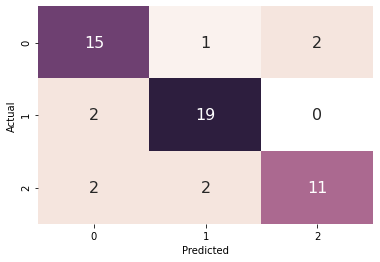

In [19]:
# Plot the result on a confusion matrix
label_names = ['0', '1', '2']
conf_mat_df = pd.DataFrame(conf_mat, index = label_names, columns = label_names)
conf_mat_df.index.name = 'Actual'
conf_mat_df.columns.name = 'Predicted'
sns.heatmap(conf_mat_df, annot=True, cmap= cmap, 
            annot_kws={"size": 16}, cbar=False)
plt.show()